# heart_failure_clinical_study

## Main Motivation 
- With an undeniable constraint in healthcare globally, I have a strong desire to be involved in being part of the solution to alleviate these challenges and improve patient health through technology. Drawing from my own medical experiences I have had to wait over 6 to 7 months to receive sufficient tests or treatment from public health care
- Throughout my studies, I have noticed data gaps in end-to-end visibility of the patient journey, that causes poor operational planning and reduce operational efficiency.
- By early identification of a patients illness and therefore fatality we can provide earlier treatment plans to improve recovery time, reducing the the constraint on healthcare and staff.
## Objectives
- Understand which features in this dataset contribute the most to a patient's mortaility in hear failure.
- Understand which demographic in terms of age and sex are more likely to end in a patients death 
- Use a patient's internal heart tests to predict the death of a patient via machine learning modelling 

1. Load data set from kaggle/ local files 
2. Use capstone project template provided by Code institute 
3. ELT: clean and transform dataset 
4. Initial analysiis and detection of outliers 
5. Engineer usable medical features, that can be understood by hospital staff
6. Explore dataset for reserch questions and Hypothesis testing 
7. Reflect findings on visualisations
8. Prepare cleaned data for dashboarding in Tableau.

## Hypothesis Testing 
1. Which features in patient are most important when considering death in heart failure?

    H1: Age plays a big role in determining the death of a patient through heart failure

2. Which internal heart test plays the significant part in determining a patients death?

    H2: Ejection fraction and serum creatinine play an important part in determining a patients death 

## Inputs

* The only input we need for our analysis is the raw heart_failure_clinical_records_dataset .csv file.

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Limitation of study 

* If you have any additional comments that don't fit in the previous bullets, please state them here. 

CREDIT ALL CODE I HAVE LESS THAN 1000 ROWS WHICH IS LIMITATION NEED TO DO A GITHUB PROJECT BOARD??



---

### **1. Load Libraries and confirm directory**

In [2]:
# Check the current directory of the project
#===========================================================================
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\lacma\\OneDrive\\Documents\\Visual Studio 2019\\heart_failure_clinical_study\\jupyter_notebooks'

In [3]:
# Data manipulation
#===============================================================================
import pandas as pd
import numpy as np
# Data visualization
#===============================================================================
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### **2. Load data and analyse basic data information** 

In [4]:
#Load raw data file into Jupyter notebook and into a panda data frame
#================================================================================= 
df_raw_data = pd.read_csv(r"C:\Users\lacma\OneDrive\Documents\Visual Studio 2019\heart_failure_clinical_study\data_set\t.csv")
df_raw_data.head(10) #Display first 10 lines of data 

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


- Challanges: Initially the raw csv was read from "data_set/heart_failure_clinical_records_dataset.csv, however mid way through the project it was not being read correctly and had to substitute the format that shows my local drive.


In [5]:
#Create a summary of information of the raw data in preparation of data cleaning
#====================================================================================
print(f'The shape of the data frame is{df_raw_data.shape}')
print(f'The data types within the data frame are{df_raw_data.dtypes}')
print(f'The data that is duplicated are {df_raw_data.duplicated().sum()}')
print(f'The data that contain missing values are {df_raw_data.isnull().sum()}')

The shape of the data frame is(299, 13)
The data types within the data frame areage                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object
The data that is duplicated are 0
The data that contain missing values are age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEA

##### Summary of Data Information

- Data shape is small/ medium size  
- Continuous data types are floats or integres and discrete data types like 'DEATH_EVENT' are already encoded to 1 and 0. where 1 is death and 0 is survived. 
- There are no duplicate values  
- There are no missing values in the raw data frame
- Remove time column from data frame as the source does not correctly identify what the column is for 
- Standardise decimal figures to values that make sense. .i.e. column age does not need a decimal point and can be converted to an integer 
- Edit the headers of the columns to remain consistent with cap sensitivity. 

### **3. Clean and preprocess data**

In [36]:
# Remove unecessary column 'time' 
#===============================================================================
df_clean = df_raw_data.drop('time', axis = 1) #drop time and rename data frame 
# Standardise all float columns to be rounded to two decimal places 
#=================================================================================
float_cols = df_clean.select_dtypes(include=['float']).columns 
df_clean[float_cols] = df_clean[float_cols].round(2)#round to 2dp
# Convert age column to integers  
#=======================================================================================================
df_clean['age']= df_clean["age"].astype(int)
# Rename column titles to be more consistent 
#=======================================================================================================
df_clean.rename(columns={"DEATH_EVENT": "death_event"}, inplace=True)
df_clean.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,death_event
0,75,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65,1,160,1,20,0,327000.00,2.7,116,0,0,1


### **4. Exploritory Analysis**

- Section 4 looks to explore noticeable patterns and trends among the data. 
- Section 4a. will do some quick data analysis so that any outliers or unlikely distributions can be indentified. This will help explain some analysis in the sections later 
- Section 4b. will test some hypothesis and answer the questions stated earlier in the objectives section of the notebook.
- Section 4c. will display feature engineering, where the new features could then be used in section 5 Machine learning.  

### 4a. Initial visualisation

In [37]:
#Understand the correlation between featues to understand the strogest patterns and trends
df_clean.corr() #find the correlation between features in data frame

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,death_event
age,1.000000,0.087574,-0.081406,-0.101454,0.060195,0.093170,-0.052475,0.159237,-0.045912,0.065546,0.018926,0.253581
anaemia,0.087574,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,0.066270
creatinine_phosphokinase,-0.081406,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,0.062728
diabetes,-0.101454,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,-0.001943
ejection_fraction,0.060195,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,-0.268603
high_blood_pressure,0.093170,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,0.079351
platelets,-0.052475,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,-0.049139
serum_creatinine,0.159237,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,0.294278
serum_sodium,-0.045912,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,-0.195204
sex,0.065546,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.004316


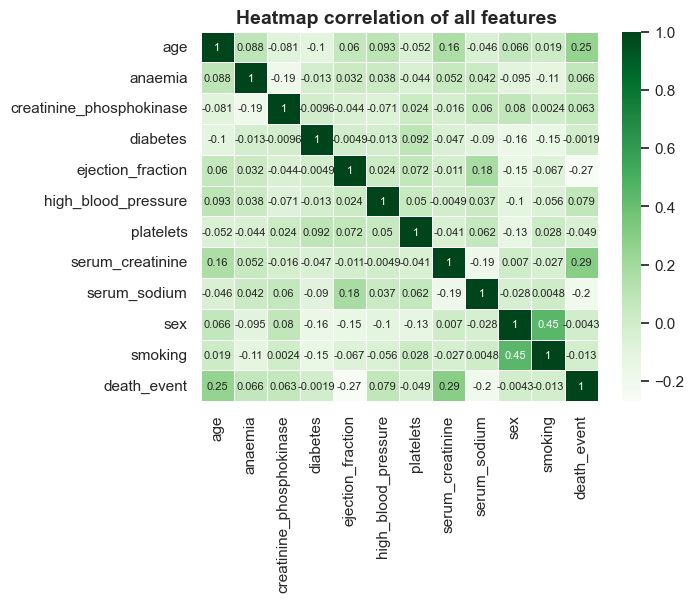

In [38]:
#Plot a heat map to better visualise the strongest and weakest correlation between the features
#================================================================================================
heatmap_figure=sns.set_theme(style="whitegrid") #format the grid colour settings 
sns.heatmap(data=df_clean.corr(), annot=True, linewidths=0.5,annot_kws={"size": 8},cmap='Greens')# set up the heatmap 
plt.title("Heatmap correlation of all features ", fontsize=14, fontweight='bold') #set title of the heat map
plt.show()#show the heatmap figure

In [9]:
#To gain a better staistical understanding of the features 
#=================================================================
df_clean.describe()#display basic summary of statistics in the data frame 

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,death_event
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.00000
mean,60.829431,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,0.32107
std,11.894997,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,1.00000


### What do the statistical terms mean?
- Mean (Average)- The mean, also known as the average is when you add up the values in a data set (along a feature)  and divide it by how many values there are. The benifits are it uses all the values in the dataset. It's a good indicator for normally distributed data but is strongly impacted by outliers.
- Median- is the absolute middle value of the data once the data has been sorted from smalles to largest. The benefits are it is not strogly effected by extreme values and is usually used for medical projects. Its drawbaxk are it does not use all the information on the data set and does not consider how far apart the values may be.
- Standard deviation- Shows the general spread of the data. If the standard deviation is small, it suggests the values are closer together. This is beneficial ass it measures the variability in a data set had helps identify outliers.

---

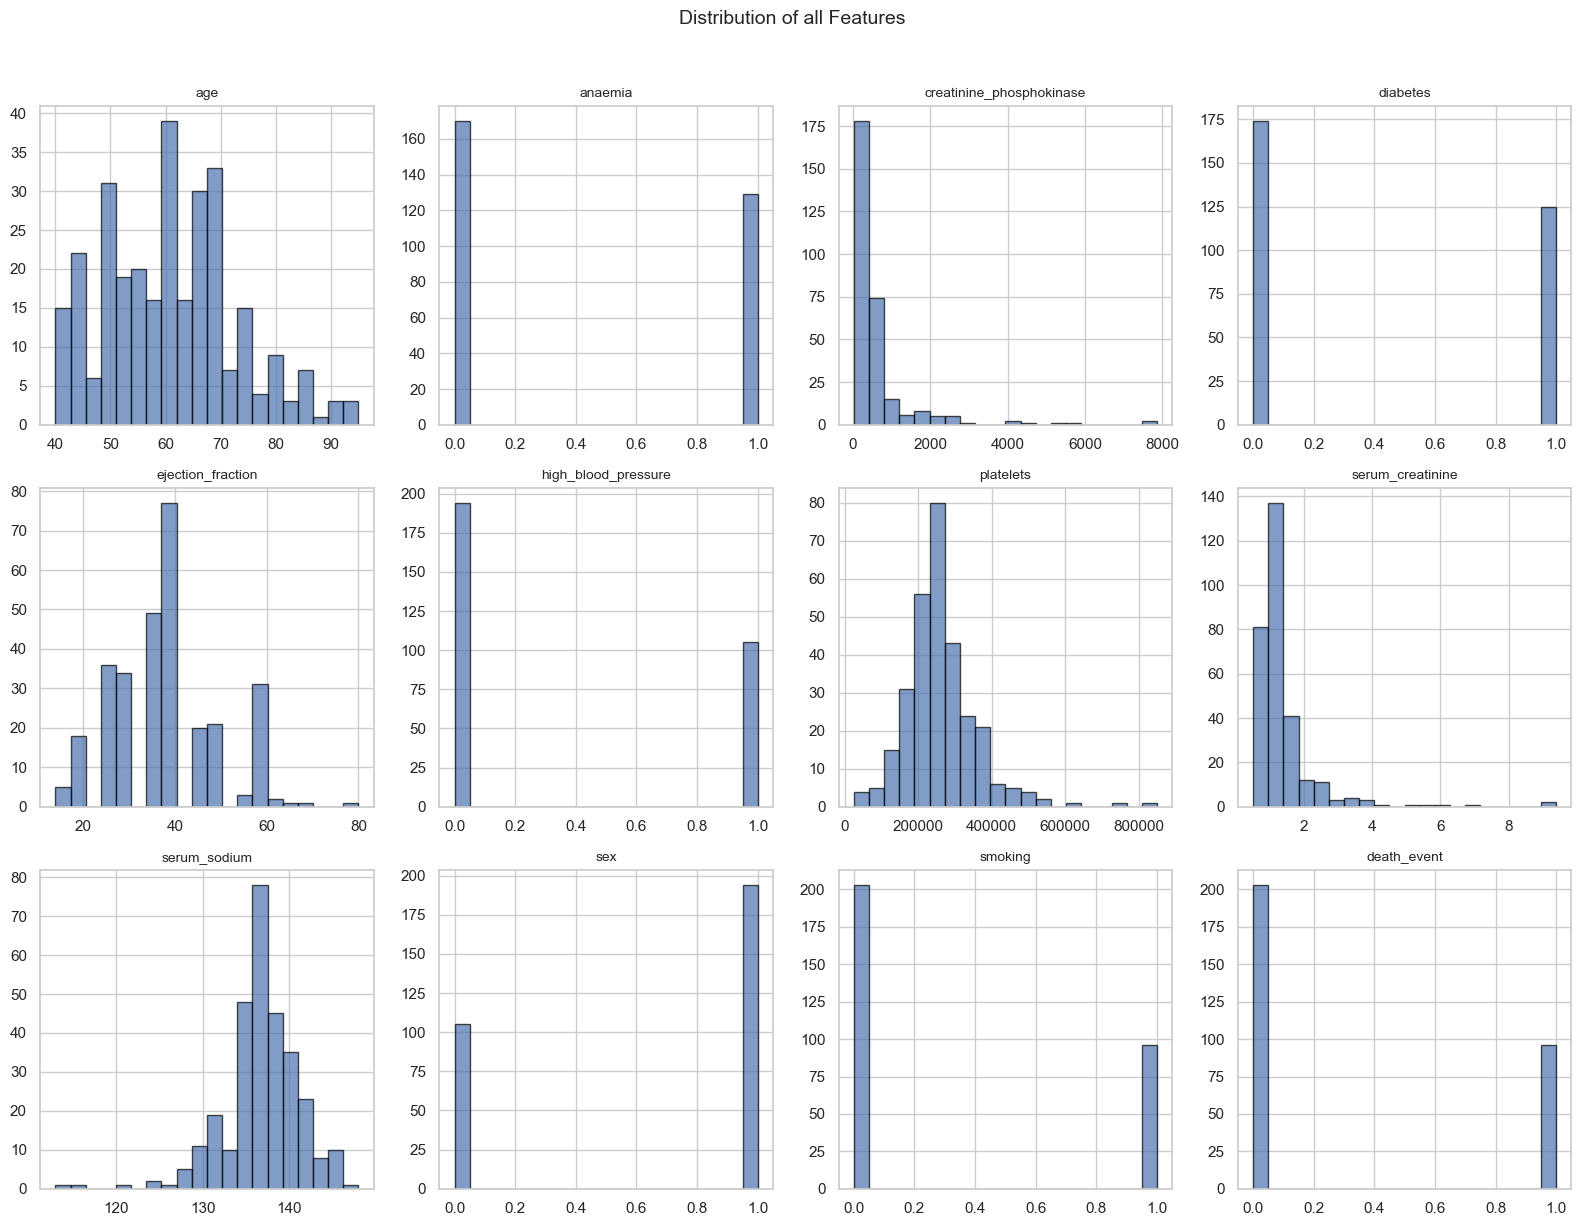

In [39]:
#plot the distribution graphs of each feature to gauge a better understanding of the spread of data 
fig, axes = plt.subplots(3, 4, figsize=(16, 12))
axes = axes.ravel()

for idx, col in enumerate(df_clean.columns[:12]):
    axes[idx].hist(df_clean[col], bins=20, edgecolor='black', alpha=0.7)
    axes[idx].set_title(col, fontsize=10)
    axes[idx].set_xlabel('')

plt.suptitle('Distribution of all Features', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

#### **Data distribution of features**
- Age: Distributed fairly normal with the center being around 60. There is a slight skew to the right side suggesting there are a few more elderly patients. Age is a strong clinical risk factor and a normal distribution makes it suitable for statistical methods 
- Anaemia, diabetes, high blood pressure, sex, smokers and death event are all binary values. More patients are less likely to have additional health risks. There are more males than females and the data for death event is fairly imbalanced. Therefore, it may not be the best data as the target variable.
- Creatinine Phosphokinase is skewed to the left with a few high outliers. Further investigation on the outliers and then normalising the data could improve modelling and predictability.
- Ejection Fraction has discrete clusters 
- Platelets are slightly positively skewed with some extreme high values. However, most clusters are in the typical physiological range. The outlier can increase variance and robust scaling could be beneficial here. The results are expexted as there is a lot of natural biological variabilty.
- Serum Creatininne has a strong positive skew and using the median coukd be more representative. The outliers could reflect severe illness and should not be ommitted from the analysis.
- Like age Serum Sodium is faily well distributed and data is well suited for parametric analysis.

### 4b. Hypothesis testing 

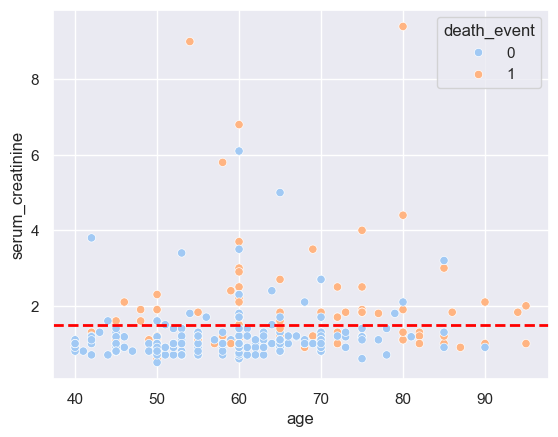

In [11]:
sns.set_theme(palette="pastel")

sns.scatterplot(data=df_clean, y='serum_creatinine', x='age', hue='death_event')

plt.axhline(1.5, linestyle='--', linewidth=2, color='red')
plt.show()

### 4c. Feature Engineering

In [41]:
df_clean['comorbidity_burden'] = (df_clean['anaemia'] + df_clean['diabetes'] + df_clean['high_blood_pressure'] +
df_clean['smoking'])
df_clean['dm_htn_interaction'] = (df_clean['diabetes'] * df_clean['high_blood_pressure'])
df_clean


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,death_event,comorbidity_burden,dm_htn_interaction
0,75,0,582,0,20,1,265000.00,1.9,130,1,0,1,1,0
1,55,0,7861,0,38,0,263358.03,1.1,136,1,0,1,0,0
2,65,0,146,0,20,0,162000.00,1.3,129,1,1,1,1,0
3,50,1,111,0,20,0,210000.00,1.9,137,1,0,1,1,0
4,65,1,160,1,20,0,327000.00,2.7,116,0,0,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62,0,61,1,38,1,155000.00,1.1,143,1,1,0,3,1
295,55,0,1820,0,38,0,270000.00,1.2,139,0,0,0,0,0
296,45,0,2060,1,60,0,742000.00,0.8,138,0,0,0,1,0
297,45,0,2413,0,38,0,140000.00,1.4,140,1,1,0,1,0


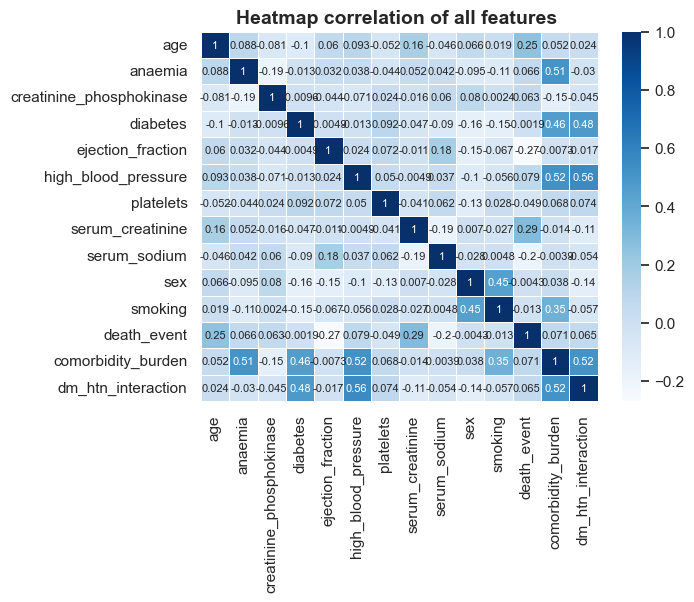

In [ ]:
#Plot a heat map to better visualise the strongest and weakest correlation between the newly engineered features
#================================================================================================================
heatmap_figure=sns.set_theme(style="whitegrid") #format the grid colour settings 
sns.heatmap(data=df_clean.corr(), annot=True, linewidths=0.5,annot_kws={"size": 8},cmap='Blues')# set up the heatmap 
plt.title("Heatmap correlation of all features ", fontsize=14, fontweight='bold') #set title of the heat map
plt.show()#show the heatmap figure

In [22]:
df_dashboard=df_clean.copy()
df_dashboard['smoking']=df_dashboard['smoking'].map({0:'non-Smoker', 1:'smoker'})
df_dashboard['anaemia']=df_dashboard['anaemia'].map({0:'not anaemic', 1:'anaemic'})
df_dashboard['diabetes']=df_dashboard['diabetes'].map({0:'not diabetic', 1:'diabetic'})
df_dashboard['high_blood_pressure']=df_dashboard['high_blood_pressure'].map({0:'normal blood pressure', 1:'high blood pressure'})
df_dashboard['sex']=df_dashboard['sex'].map({0:'female', 1:'male'})
df_dashboard['death_event']=df_dashboard['death_event'].map({0:'survived', 1:'died'})
df_dashboard

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,death_event,comorbidity_burden,dm_htn_interaction
0,75,not anaemic,582,not diabetic,20,high blood pressure,265000.00,1.9,130,male,non-Smoker,died,1,0
1,55,not anaemic,7861,not diabetic,38,normal blood pressure,263358.03,1.1,136,male,non-Smoker,died,0,0
2,65,not anaemic,146,not diabetic,20,normal blood pressure,162000.00,1.3,129,male,smoker,died,1,0
3,50,anaemic,111,not diabetic,20,normal blood pressure,210000.00,1.9,137,male,non-Smoker,died,1,0
4,65,anaemic,160,diabetic,20,normal blood pressure,327000.00,2.7,116,female,non-Smoker,died,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62,not anaemic,61,diabetic,38,high blood pressure,155000.00,1.1,143,male,smoker,survived,3,1
295,55,not anaemic,1820,not diabetic,38,normal blood pressure,270000.00,1.2,139,female,non-Smoker,survived,0,0
296,45,not anaemic,2060,diabetic,60,normal blood pressure,742000.00,0.8,138,female,non-Smoker,survived,1,0
297,45,not anaemic,2413,not diabetic,38,normal blood pressure,140000.00,1.4,140,male,smoker,survived,1,0


In [26]:
# For Classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [16]:
x_class= df_clean[['serum_creatinine','age']]
y_class= df_clean['death_event']
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    x_class, y_class, test_size=0.2, random_state=42)
print(f"Training on {len(X_train_class)} patients")
print(f"Testing on {len(X_test_class)} patients")
print()
print("Distribution in training set:")
print(y_train_class.value_counts())

Training on 239 patients
Testing on 60 patients

Distribution in training set:
death_event
0    168
1     71
Name: count, dtype: int64


---

In [17]:
# CLASSIFICATION ALGORITHMS COMPARISON
print("TESTING DIFFERENT CLASSIFICATION ALGORITHMS\n")

# Define simple algorithms to test
classification_models = [
    ('Logistic Regression', LogisticRegression(random_state=42, max_iter=1000)),
    ('Decision Tree', DecisionTreeClassifier(max_depth=5, random_state=42)),
    ('Random Forest', RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42)),
    ('K-Neighbors', KNeighborsClassifier(n_neighbors=5))
]

# Store results for different metrics
results_acc = []
results_f1 = []

print("Testing each algorithm...\n")
for name, model in classification_models:
    # Accuracy scores
    acc_scores = cross_val_score(model, x_class, y_class, cv=5, scoring='accuracy')
    results_acc.append(acc_scores)
    
    # F1 scores
    f1_scores = cross_val_score(model, x_class, y_class, cv=5, scoring='f1')
    results_f1.append(f1_scores)
    
    print(f"{name:20} | Accuracy: {acc_scores.mean():.2%} | F1: {f1_scores.mean():.2%}")

TESTING DIFFERENT CLASSIFICATION ALGORITHMS

Testing each algorithm...

Logistic Regression  | Accuracy: 71.56% | F1: 36.31%
Decision Tree        | Accuracy: 69.90% | F1: 42.55%
Random Forest        | Accuracy: 72.91% | F1: 49.60%
K-Neighbors          | Accuracy: 65.86% | F1: 37.82%


C:\Users\lacma\AppData\Local\Temp\ipykernel_2832\3894727409.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp1 = axes[0].boxplot(results_acc, labels=[name for name, _ in classification_models])
C:\Users\lacma\AppData\Local\Temp\ipykernel_2832\3894727409.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp2 = axes[1].boxplot(results_f1, labels=[name for name, _ in classification_models])


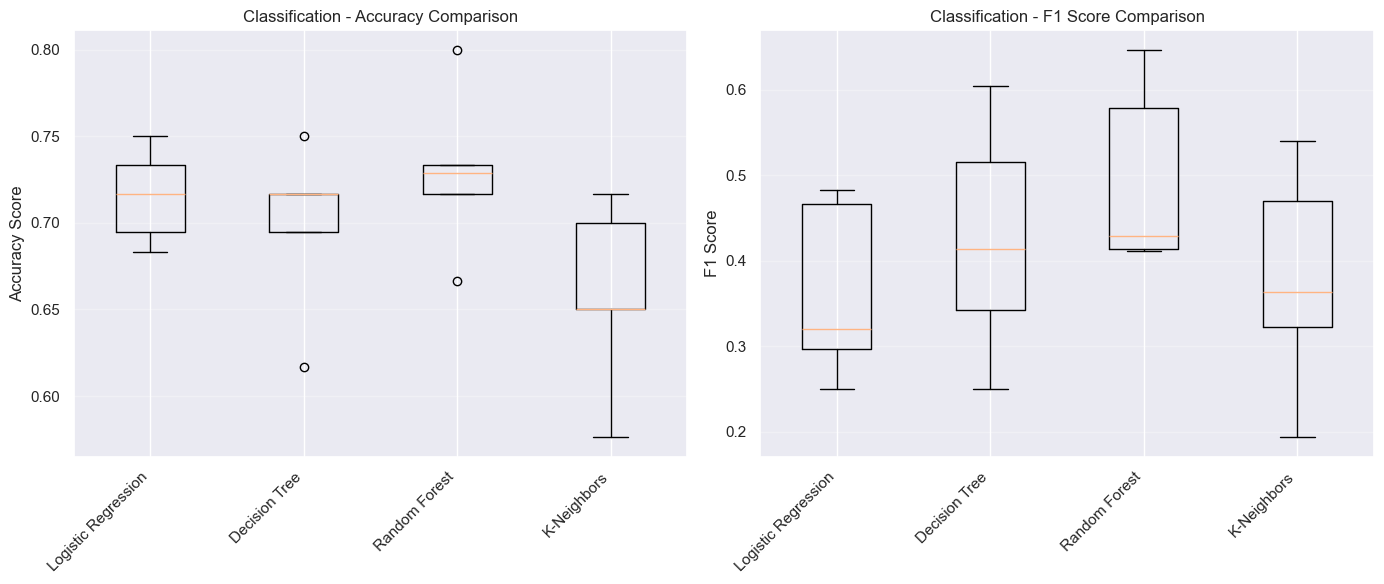

Best for Accuracy: Random Forest
Best for F1 Score: Random Forest


In [18]:
# Visualise classification results
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Accuracy boxplot
bp1 = axes[0].boxplot(results_acc, labels=[name for name, _ in classification_models])
axes[0].set_ylabel('Accuracy Score')
axes[0].set_title('Classification - Accuracy Comparison')
axes[0].set_xticklabels([name for name, _ in classification_models], rotation=45, ha='right')
axes[0].grid(True, alpha=0.3, axis='y')

# F1 Score boxplot
bp2 = axes[1].boxplot(results_f1, labels=[name for name, _ in classification_models])
axes[1].set_ylabel('F1 Score')
axes[1].set_title('Classification - F1 Score Comparison')
axes[1].set_xticklabels([name for name, _ in classification_models], rotation=45, ha='right')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Find best models
best_acc_idx = np.argmax([np.mean(scores) for scores in results_acc])
best_f1_idx = np.argmax([np.mean(scores) for scores in results_f1])

print(f"Best for Accuracy: {classification_models[best_acc_idx][0]}")
print(f"Best for F1 Score: {classification_models[best_f1_idx][0]}")

In [19]:
df_feature=df_clean.copy()
df_feature=df_feature[
    [
        'age',
        'anaemia',
        'creatinine_phosphokinase',
        'diabetes',
        'ejection_fraction',
        'high_blood_pressure',
        'platelets',
        'serum_creatinine',
        'serum_sodium',
        'sex',
        'smoking',
        'comorbidity_burden',
        'dm_htn_interaction'
    ]]


In [20]:
x_class_model= df_feature
y_class_model= df_clean['death_event']
X_train_class_model, X_test_class_model, y_train_class_model, y_test_class_model = train_test_split(
    x_class_model, y_class_model, test_size=0.2, random_state=42)
print(f"Training on {len(X_train_class)} patients")
print(f"Testing on {len(X_test_class)} patients")
print()
print("Distribution in training set:")
print(y_train_class_model.value_counts())

Training on 239 patients
Testing on 60 patients

Distribution in training set:
death_event
0    168
1     71
Name: count, dtype: int64


In [21]:
# Train baseline Random Forest
rf_baseline = RandomForestClassifier(random_state=42)
rf_baseline.fit(X_train_class_model, y_train_class_model)

# Predictions
y_pred = rf_baseline.predict(X_test_class_model)

# Performance
accuracy = accuracy_score(y_test_class_model, y_pred)

In [22]:
# Get and format feature importance
feature_importance = pd.DataFrame({
    'feature': df_feature.columns,
    'importance': rf_baseline.feature_importances_
})

# Round and sort by importance
feature_importance = feature_importance.round(3).sort_values(by='importance', ascending=False)

# Display the result
feature_importance

,feature,importance
7,serum_creatinine,0.204
4,ejection_fraction,0.189
0,age,0.134
2,creatinine_phosphokinase,0.125
6,platelets,0.115
8,serum_sodium,0.093
11,comorbidity_burden,0.043
9,sex,0.020
1,anaemia,0.019
10,smoking,0.017


In [23]:
x_class_top= df_clean[['serum_creatinine','ejection_fraction','age','creatinine_phosphokinase']]
y_class_top= df_clean['death_event']
X_train_class_top, X_test_class_top, y_train_class_top, y_test_class_top = train_test_split(
    x_class_top, y_class_top, test_size=0.2, random_state=42)
print(f"Training on {len(X_train_class_top)} patients")
print(f"Testing on {len(X_test_class_top)} patients")
print()
print("Distribution in training set:")
print(y_train_class_top.value_counts())

Training on 239 patients
Testing on 60 patients

Distribution in training set:
death_event
0    168
1     71
Name: count, dtype: int64


In [24]:
# Train the classification model
class_model = RandomForestClassifier(random_state=42)
class_model.fit(X_train_class_top, y_train_class_top)

# Make predictions
y_pred_class_top = class_model.predict(X_test_class_top)

In [25]:
# Count correct predictions
correct = (y_pred_class_top == y_test_class_top).sum()
total = len(y_test_class_top)
accuracy = accuracy_score(y_test_class_top, y_pred_class_top)

print(f"Results:")
print(f"   Correct: {correct} patients")
print(f"   Wrong: {total - correct} patients")
print(f"   Accuracy: {accuracy:.1%}")
print()


Results:
   Correct: 39 patients
   Wrong: 21 patients
   Accuracy: 65.0%



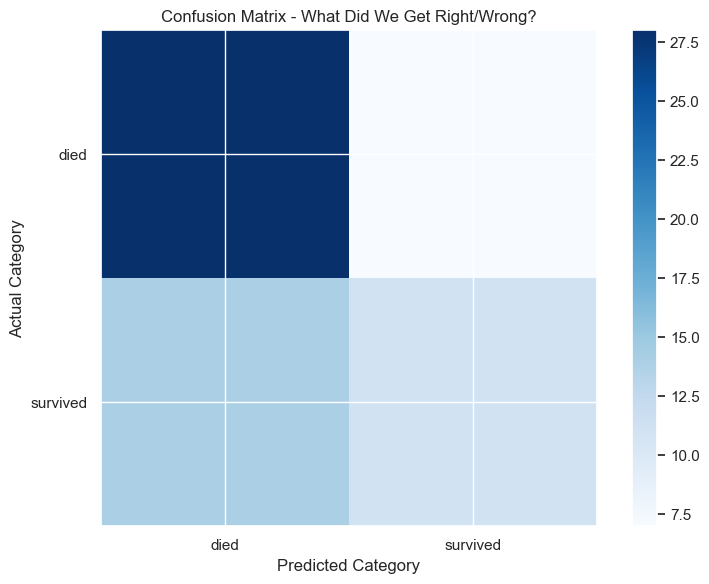

How to Read This:
  • Top-left (28): Patients who have died have been correctly identified
  • Bottom-right (11): Patients who have survived have been correctly identified
  • Top-right (7): Patients who have died have wrongly been identified as survived
  • Bottom-left (14): Patients who have survived have wrongly been identified as survived



In [29]:
# Confusion Matrix - shows what we got right and wrong
cm = confusion_matrix(y_test_class_top, y_pred_class_top)

# Visualise confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix - What Did We Get Right/Wrong?')
plt.colorbar()

# Add labels
classes = ['died', 'survived']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)


plt.ylabel('Actual Category')
plt.xlabel('Predicted Category')
plt.tight_layout()
plt.show()

print("How to Read This:")
print(f"  • Top-left ({cm[0,0]}): Patients who have died have been correctly identified")
print(f"  • Bottom-right ({cm[1,1]}): Patients who have survived have been correctly identified")
print(f"  • Top-right ({cm[0,1]}): Patients who have died have wrongly been identified as survived")
print(f"  • Bottom-left ({cm[1,0]}): Patients who have survived have wrongly been identified as survived")
print()

In [33]:
# Interactive prediction example
print("Let's predict the fate of a patient depending on a few features!")
print("=" * 40)

# You can change these values!
serum_creatinine=1.9
ejection_fraction=20
age=76
creatinine_phosphokinase=265000

print(f"Patient test results")
print(f"  • Serum Creatinine: {serum_creatinine}")
print(f"  • Ejection Fraction: {ejection_fraction}")
print(f"  • Age: {age}")
print(f"  • Creatinine phosphokinase: {creatinine_phosphokinase}")
print()


# Classification prediction
category_pred = class_model.predict([[serum_creatinine, ejection_fraction,age,creatinine_phosphokinase]])[0]
if category_pred ==1:
    print('CLASSIFICATION says: death') 
else:
    print('CLASSIFICATION says: survived')




Let's predict the fate of a patient depending on a few features!
Patient test results
  • Serum Creatinine: 1.9
  • Ejection Fraction: 20
  • Age: 76
  • Creatinine phosphokinase: 265000

CLASSIFICATION says: death


c:\Users\lacma\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
